### FP_RATIO를 조절하면서 결과 뽑아내보기

In [136]:
import numpy as np


for FP_RATIO in list(np.arange(0.00, 0.36, 0.05)):
    FP_RATIO = round(FP_RATIO,2)
    OUTPUT_SCORE = "./output/" + str(FP_RATIO) + "_score.txt"
    FIG_OUTPUT = "./output/" + str(FP_RATIO)  + "_fig.png"

    ! qsub -pe smp 1 -e "./log" -o "./log" -N "vis"$FP_RATIO Visualization_MRS_consecutive.sh --TRIAL_NUM 5 --RANDOM_PICK 1000 --FP_RATIO $FP_RATIO --OUTPUT_SCORE $OUTPUT_SCORE --FIG_OUTPUT $FIG_OUTPUT

Your job 48724 ("vis0.0") has been submitted
Your job 48725 ("vis0.05") has been submitted
Your job 48726 ("vis0.1") has been submitted
Your job 48727 ("vis0.15") has been submitted
Your job 48728 ("vis0.2") has been submitted
Your job 48729 ("vis0.25") has been submitted
Your job 48730 ("vis0.3") has been submitted
Your job 48731 ("vis0.35") has been submitted


### VISUALIZATION

In [1]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas as pd 
import palettable
vivid_10 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
colorlist = [i for i in vivid_10]

df = pd.DataFrame (columns = ['FP_RATIO','original','outlier_removal']) 

for FP_RATIO in list(np.arange(0.00, 0.36, 0.05)):
    FP_RATIO = round(FP_RATIO,2)
    OUTPUT_SCORE = "./output/" + str(FP_RATIO) + "_score.txt"

    input_df = pd.read_csv (OUTPUT_SCORE, sep = "\t", names = ['FP_RATIO','original','outlier_removal'])
    df = df.append(input_df)
    

findfont: Font family ['Nanum Square'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Nanum Square'] not found. Falling back to DejaVu Sans.


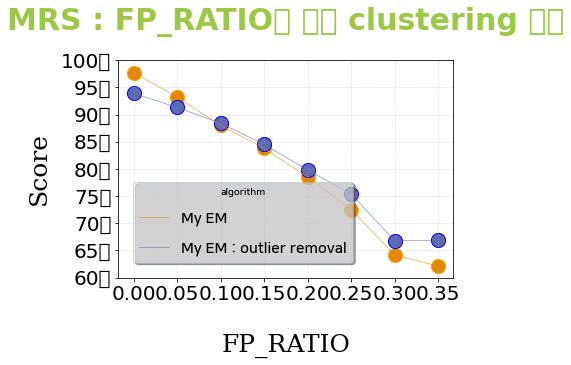

In [34]:
fig, ax = plt.pyplot.subplots(1,1)

#plt.figure (figsize = (30,10))
plt.rcParams["figure.figsize"] = (16,16)
plt.rcParams["font.family"] = 'NanumSquare_ac'


Bbox = [[1.0, 1.0], [1.0, 1.0]] 

df.plot( x = 'FP_RATIO', y = 'original', kind = "scatter", color = colorlist[0], ec = "orange", s = 200, ax = ax)
df.plot( x = 'FP_RATIO', y = 'original', kind = "line", color = colorlist[0], linewidth = 0.5, ax = ax, label = "My EM")
df.plot( x = 'FP_RATIO', y = 'outlier_removal', kind = "scatter", color = colorlist[1],  ec = "blue", ax = ax, s = 200)
df.plot( x = 'FP_RATIO', y = 'outlier_removal', kind = "line", color = colorlist[1], linewidth = .5, ax = ax, label = "My EM : outlier removal")
ax.annotate (str(int(df.iloc[2]["outlier_removal"])) , fontsize = 30,
                        xy = (10,10),
                        textcoords = 'offset points', xytext = (1,1))

ax.legend(fontsize=15, frameon = True, shadow = True, markerscale = 10, edgecolor = "#90a4ae", framealpha = 0.5, labelspacing = 1, title = "algorithm", borderaxespad = 1)

ax.set_title ("MRS : FP_RATIO에 따른 clustering 점수", size = 30 , pad = 30, color = colorlist[3], fontweight = "semibold")
ax.tick_params(axis='both', labelsize=20)

ax.set_xticks([round(fp, 2) for fp in list(df["FP_RATIO"])])
ax.set_yticks(list(np.arange(60, 105,5)) )
ax.set_xlabel ("FP_RATIO", size = 25, labelpad = 30, fontproperties = plt.font_manager.FontProperties(fname="/home/goldpm1/miniconda3/envs/cnvpytor/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf"))
ax.set_ylabel ("Score", size = 25, labelpad = 10, fontproperties = plt.font_manager.FontProperties(fname="/home/goldpm1/miniconda3/envs/cnvpytor/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf"))
ax.set_yticklabels (["{0}점".format(i) for i in list(np.arange(60, 105,5))])  
ax.grid (visible = "True", linewidth = 0.5, linestyle = ":")

In [31]:
prop.get_family()

['Nanum Square']